In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)  # "Labeled Faces in the Wild"

In [3]:
X_lfw = lfw_people.data
n_samples, h, w = lfw_people.images.shape
print(X_lfw.shape)
print(lfw_people.images.shape)

(1288, 1850)
(1288, 50, 37)


In [4]:
face_index = 7
some_face = lfw_people.images[face_index].reshape(h, w)

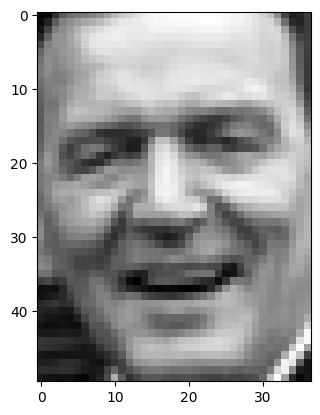

In [5]:
plt.imshow(some_face, cmap="gray")
plt.show()

In [6]:
pca_lfw = decomposition.PCA(n_components=3)
pca_lfw.fit(X_lfw)
X_lfw_reduced = pca_lfw.transform(X_lfw)

In [7]:
X_lfw_reduced.shape

(1288, 3)

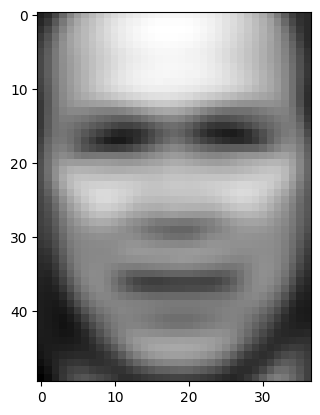

In [8]:
average_face = np.mean(X_lfw, axis=0)
plt.imshow(average_face.reshape(h, w), cmap='gray')
plt.show()

In [9]:
eigenfaces = pca_lfw.components_
print(eigenfaces.shape)

(3, 1850)


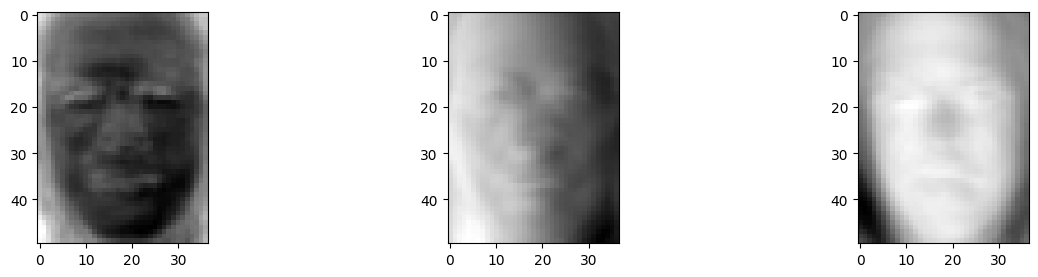

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for ax, face in zip(axes.flatten(), eigenfaces):
    ax.imshow(face.reshape(h, w), cmap='gray')

In [11]:
face_coordinates = pca_lfw.transform(X_lfw[face_index:face_index+1])
print(face_coordinates)

[[-2.4439905  -2.5145078  -0.47989267]]


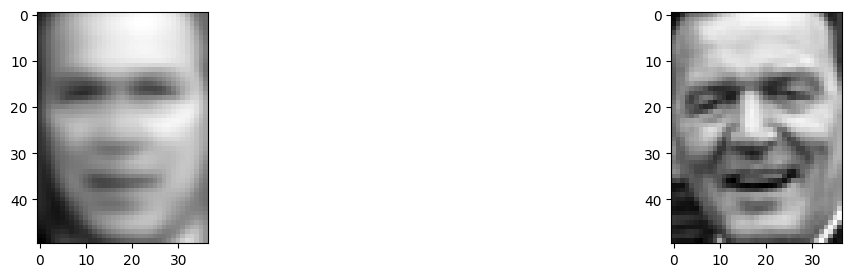

In [12]:
face_lower_dim = face_coordinates @ eigenfaces + average_face

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
ax1.imshow(face_lower_dim.reshape(h, w), cmap='gray')
ax2.imshow(some_face, cmap='gray')
plt.show()

In [13]:
pca_lfw = decomposition.PCA(n_components=200)
pca_lfw.fit(X_lfw)
X_lfw_reduced = pca_lfw.transform(X_lfw)

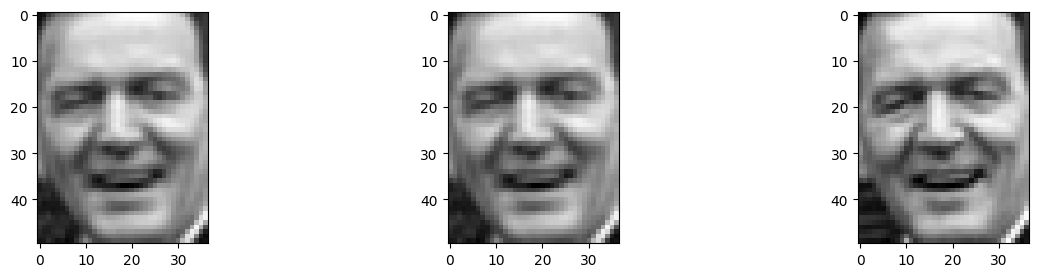

In [14]:
face_coordinates = pca_lfw.transform(X_lfw[face_index:face_index+1])

eigenfaces = pca_lfw.components_
face_lower_dim1  = face_coordinates @ eigenfaces + average_face
face_lower_dim2 = pca_lfw.inverse_transform(face_coordinates)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.imshow(face_lower_dim1.reshape(h, w), cmap='gray')
ax2.imshow(face_lower_dim2.reshape(h, w), cmap='gray')
ax3.imshow(some_face, cmap='gray')
plt.show()

In [15]:
img_baboon = imageio.v2.imread('https://raw.githubusercontent.com/lorek/datasets/master/baboon.bmp',pilmode='L')

In [16]:
from PIL import Image 
# magiczne liczby
resized_baboon = np.array(Image.fromarray(img_baboon).resize((h,h)).crop((6, 0, 43, 50)))

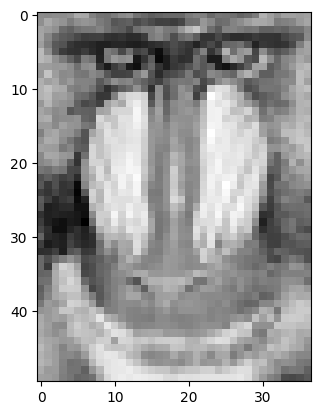

In [17]:
plt.imshow(resized_baboon, cmap="gray")
plt.show()

In [18]:
baboon_coordinates = pca_lfw.transform(resized_baboon.reshape(h*w)[np.newaxis])
baboon_original_space = pca_lfw.inverse_transform(baboon_coordinates)

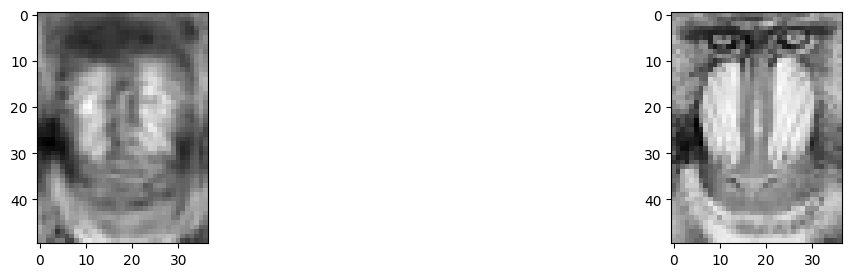

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
ax1.imshow(baboon_original_space.reshape(h, w), cmap='gray')
ax2.imshow(resized_baboon, cmap='gray')
plt.show()

Nauka poszła za daleko...

In [20]:
not_baboon = imageio.v2.imread('not_baboon.bmp',pilmode='L')

In [21]:
not_baboon_coordinates = pca_lfw.transform(not_baboon.reshape(h*w)[np.newaxis])
not_baboon_original_space = pca_lfw.inverse_transform(not_baboon_coordinates)

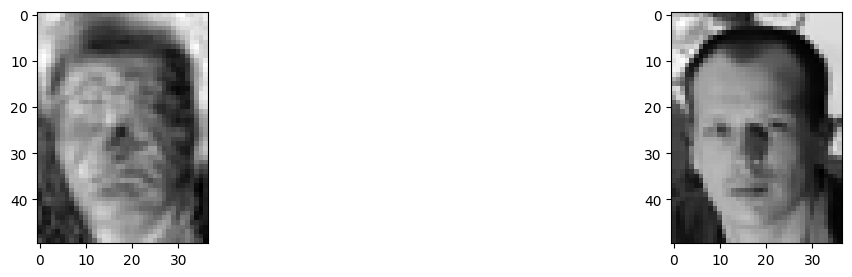

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
ax1.imshow(not_baboon_original_space.reshape(h, w), cmap='gray')
ax2.imshow(not_baboon, cmap='gray')
plt.show()